In [1]:
# Developer's setting
%load_ext autoreload
%autoreload 2

In [2]:
# import gftt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib

In [3]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}
font = {'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('legend', fontsize=16)
axes_settings = {'linewidth'   : 2}
matplotlib.rc('axes', **axes_settings)

In [4]:
df = pd.read_csv('../results_2022.csv', dtype=str)
df = df.replace('varying: multi-pass', 0)
# df.loc[df['Template size (m)'] == 'varying: multi-pass'] = '0'
for field in ['Pixel spacing (m)',
              'Template size (m)',
              'SAV-uncertainty-x',
              'SAV-uncertainty-y',
              'SAV-peak-x',
              'SAV-peak-y',
              'LSR-uncertainty-nm',
              'LSR-uncertainty-sh',
              'pt0_velodiff', 
              'pt1_velodiff', 
              'pt2_velodiff', 
              'pt0_vxdiff',
              'pt0_vydiff',
              'pt1_vxdiff',
              'pt1_vydiff',
              'pt2_vxdiff',
              'pt2_vydiff',
              'pt0_vxavgdiff',
              'pt0_vyavgdiff',
              'pt1_vxavgdiff',
              'pt1_vyavgdiff',
              'pt2_vxavgdiff',
              'pt2_vyavgdiff',
              'SAV-outlier-percent',
              'Invalid-pixel-percent']:
    df[field] = df[field].astype(float)

datestrs = ['LS8-20180304-20180405', 'LS8-20180802-20180818', 'Sen2-20180304-20180314', 'Sen2-20180508-20180627']



demo = df
# demo

In [5]:
df['larger_u'] = np.where(df['SAV-uncertainty-x'] > df['SAV-uncertainty-y'], df['SAV-uncertainty-x'], df['SAV-uncertainty-y'])

In [6]:
df['large_vxdiff'] = np.abs(df['pt0_vxdiff']) > df['SAV-uncertainty-x']
df['large_vydiff'] = np.abs(df['pt0_vydiff']) > df['SAV-uncertainty-y']
df['large_vxavgdiff'] = np.abs(df['pt0_vxavgdiff']) > df['SAV-uncertainty-x']
df['large_vyavgdiff'] = np.abs(df['pt0_vyavgdiff']) > df['SAV-uncertainty-y']

In [7]:
df['large_velodiff'] = np.abs(df['pt0_velodiff']) > df['larger_u']
df['large_velomag'] = np.abs(df['pt0_velodiff']) / df['larger_u']

In [12]:
# demo = df.loc[df['Date'] == datestrs[0]]
# demo = df.loc[df['Date'] != datestrs[3]]
demo = df

<AxesSubplot:xlabel='SAV-uncertainty-y', ylabel='LSR-uncertainty-sh'>

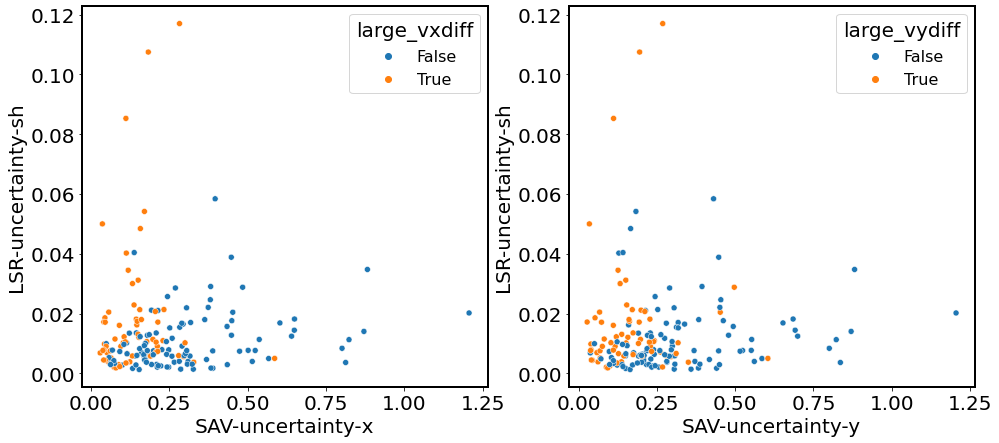

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='LSR-uncertainty-sh', hue='large_vxdiff', ax=axs[0])
# axs[0].set_ylim(0, 0.02)
sns.scatterplot(data=demo, x='SAV-uncertainty-y', y='LSR-uncertainty-sh', hue='large_vydiff', ax=axs[1])
# axs[1].set_ylim(0, 0.02)

<AxesSubplot:xlabel='SAV-uncertainty-y', ylabel='LSR-uncertainty-sh'>

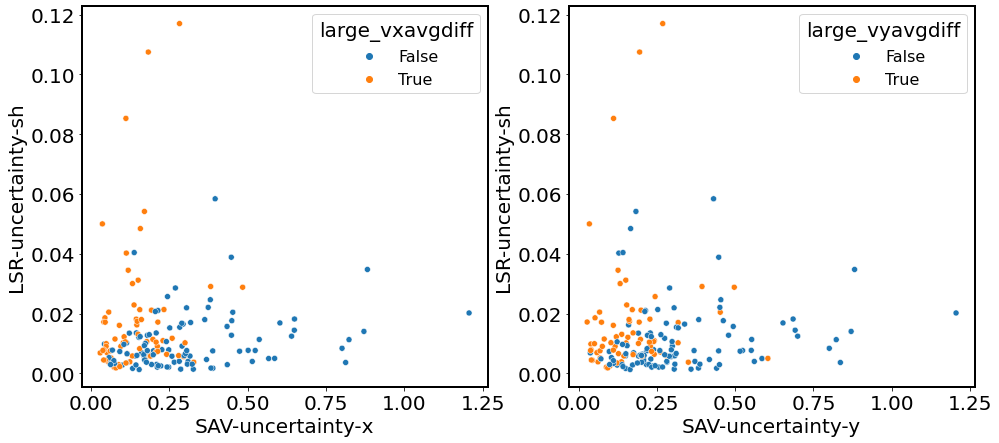

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='LSR-uncertainty-sh', hue='large_vxavgdiff', ax=axs[0])
# axs[0].set_ylim(0, 0.02)
sns.scatterplot(data=demo, x='SAV-uncertainty-y', y='LSR-uncertainty-sh', hue='large_vyavgdiff', ax=axs[1])
# axs[1].set_ylim(0, 0.02)

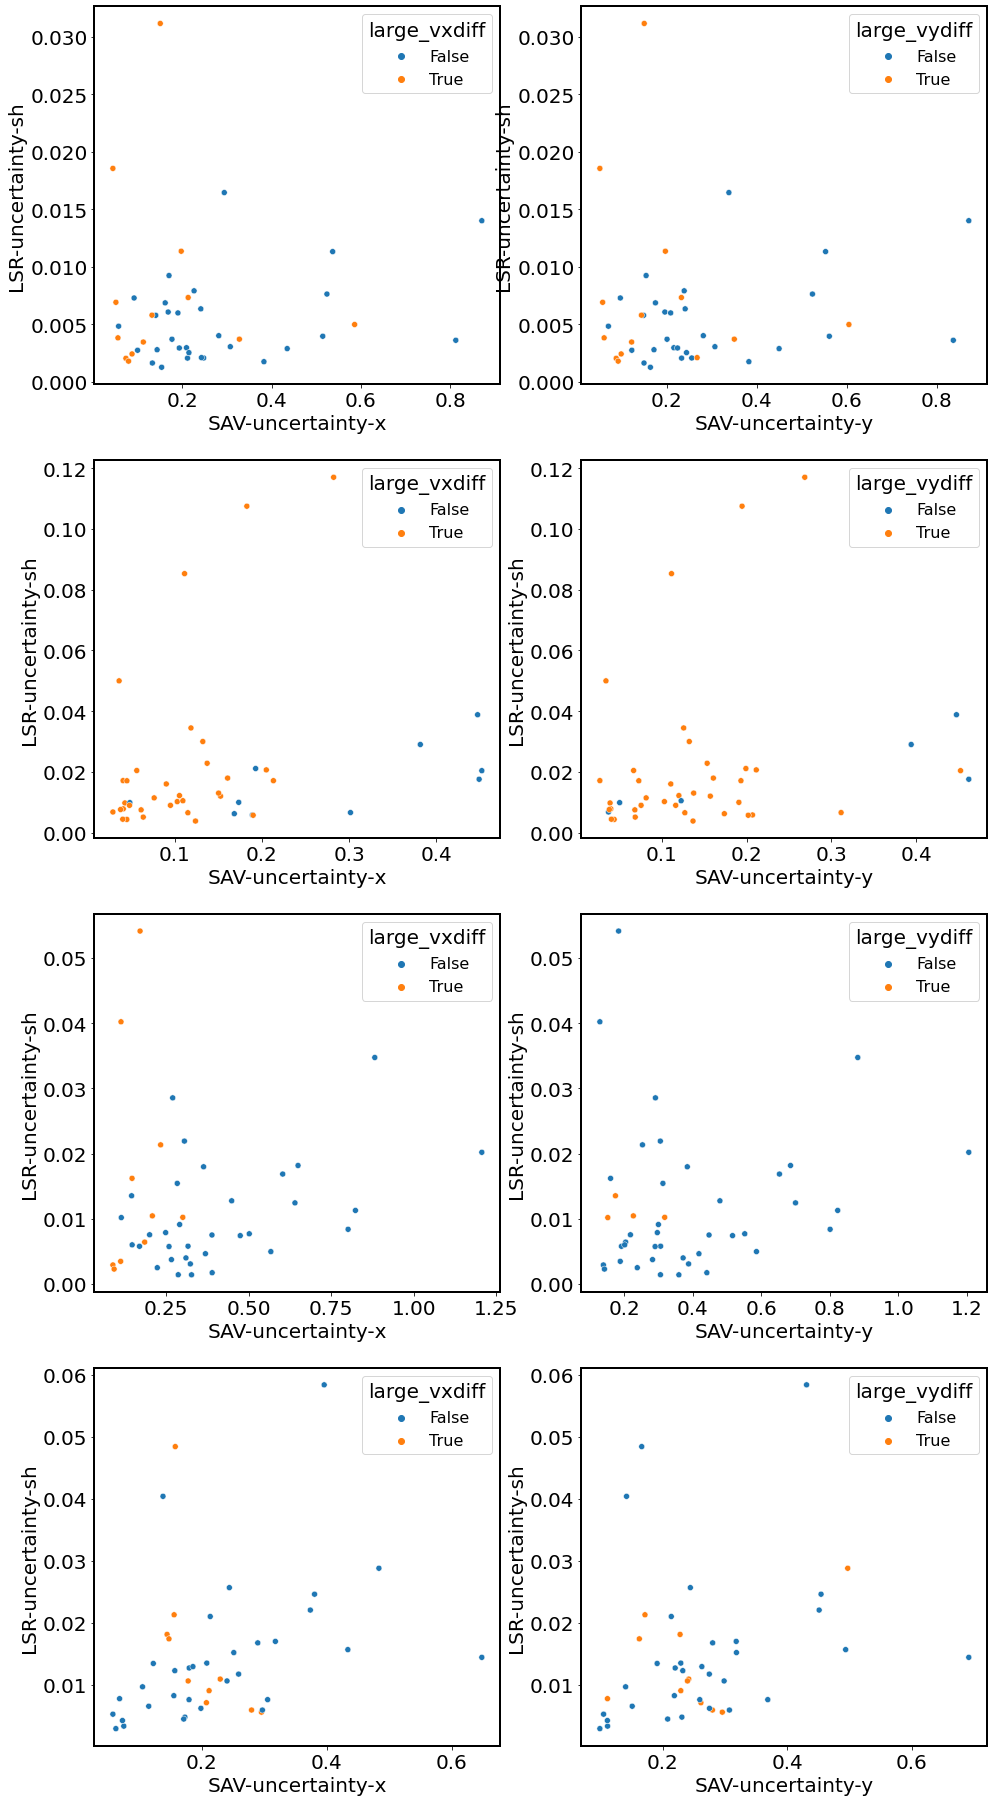

In [10]:
# plt.subplots(figsize=(7, 7))
# sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='LSR-uncertainty-nm', hue='large_vxdiff')

fig, axs = plt.subplots(4, 2, figsize=(16, 32))
for i in range(4):
    demo = df.loc[df['Date'] == datestrs[i]]
    sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='LSR-uncertainty-sh', hue='large_vxdiff', ax=axs[i, 0])
    # axs[0].set_ylim(0, 0.02)
    sns.scatterplot(data=demo, x='SAV-uncertainty-y', y='LSR-uncertainty-sh', hue='large_vydiff', ax=axs[i, 1])
    # axs[1].set_ylim(0, 0.02)

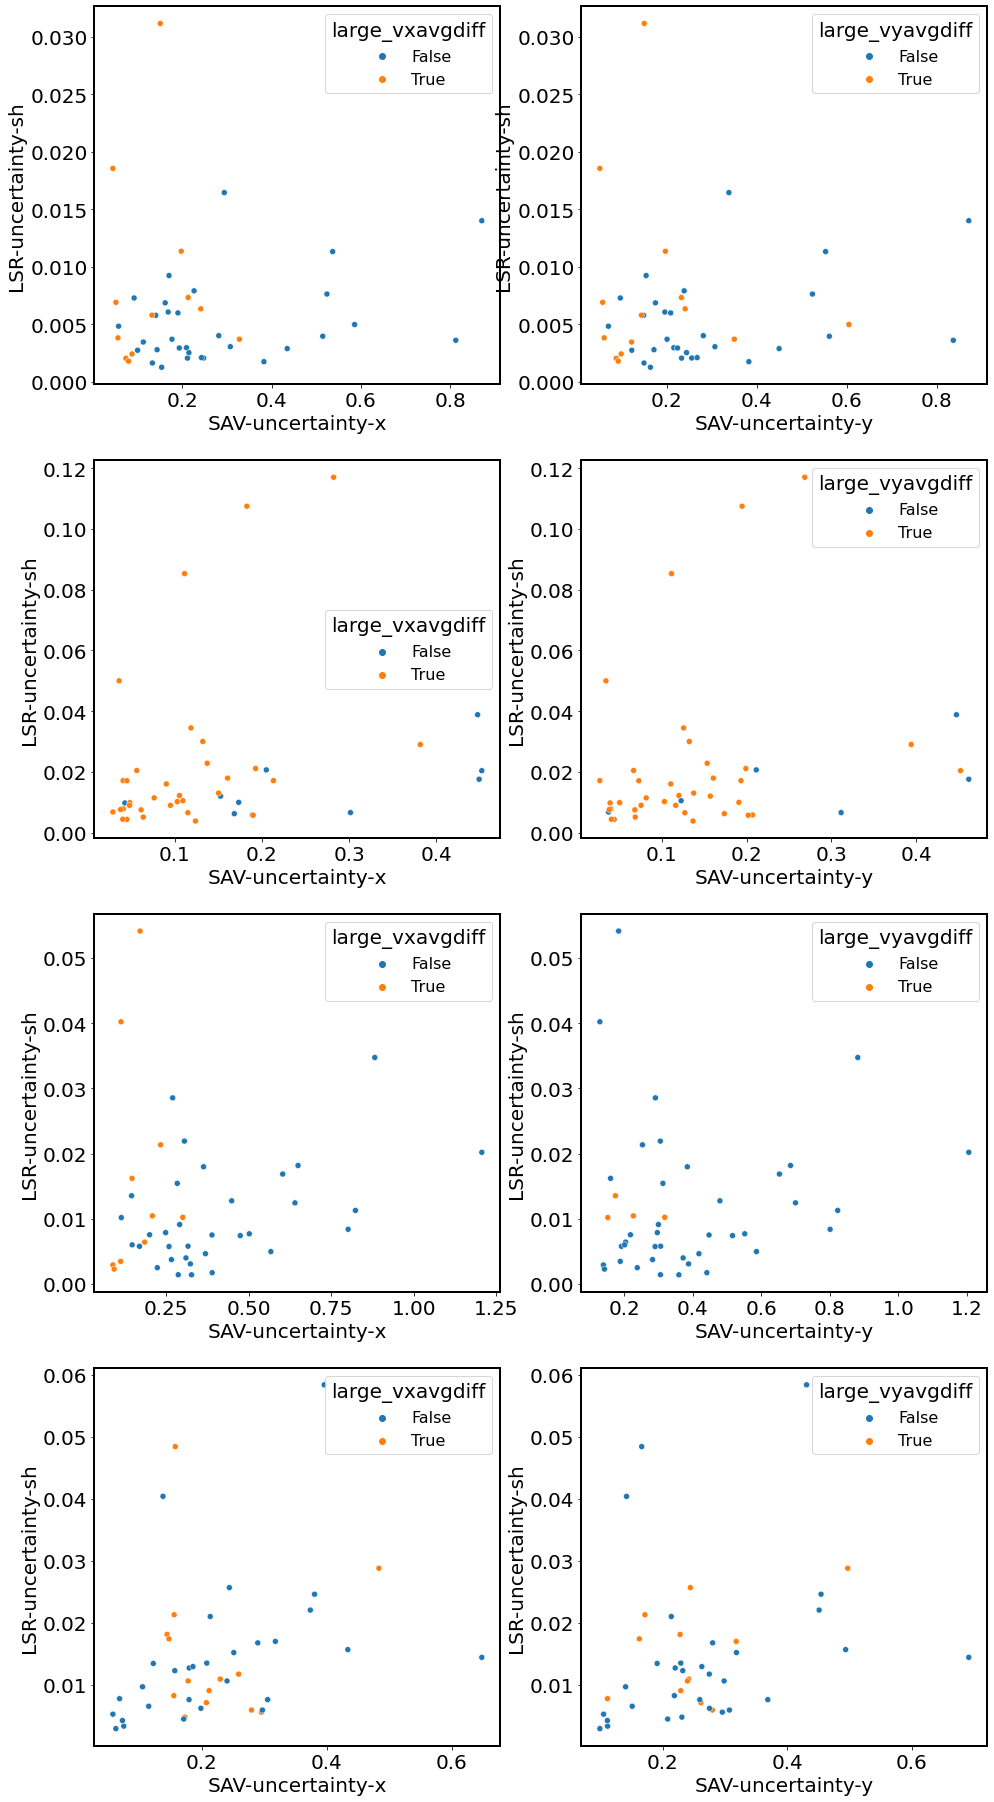

In [11]:
# plt.subplots(figsize=(7, 7))
# sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='LSR-uncertainty-nm', hue='large_vxdiff')

fig, axs = plt.subplots(4, 2, figsize=(16, 32))
for i in range(4):
    demo = df.loc[df['Date'] == datestrs[i]]
    sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='LSR-uncertainty-sh', hue='large_vxavgdiff', ax=axs[i, 0])
    # axs[0].set_ylim(0, 0.02)
    sns.scatterplot(data=demo, x='SAV-uncertainty-y', y='LSR-uncertainty-sh', hue='large_vyavgdiff', ax=axs[i, 1])
    # axs[1].set_ylim(0, 0.02)

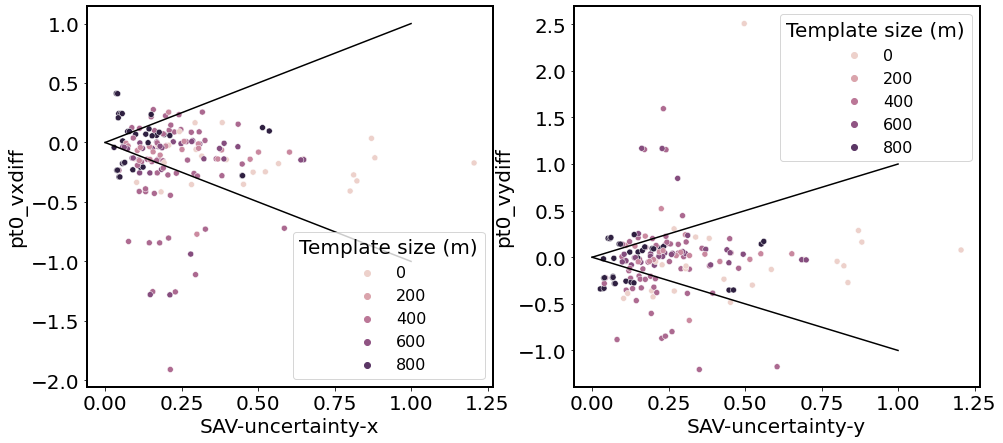

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='pt0_vxdiff', hue='Template size (m)', ax=axs[0])
axs[0].plot([0, 1], [0, 1], color='black')
axs[0].plot([0, 1], [0, -1], color='black')
sns.scatterplot(data=demo, x='SAV-uncertainty-y', y='pt0_vydiff', hue='Template size (m)', ax=axs[1])
axs[1].plot([0, 1], [0, 1], color='black')
axs[1].plot([0, 1], [0, -1], color='black')

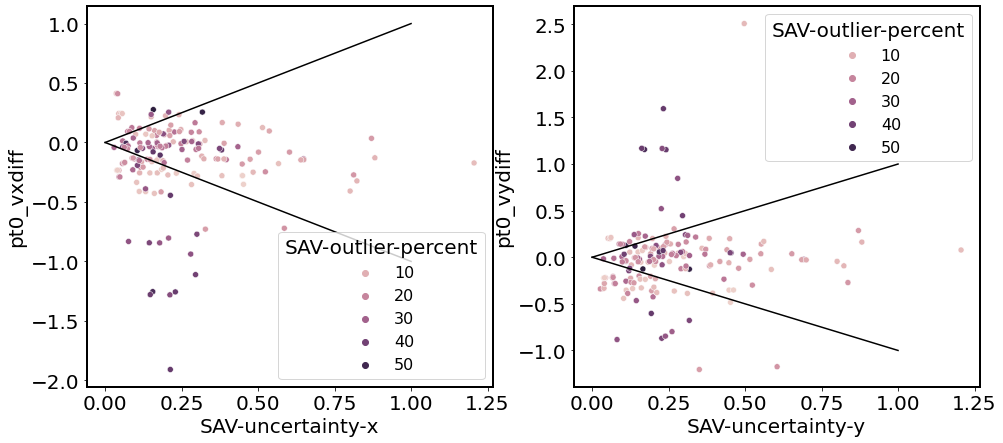

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='pt0_vxdiff', hue='SAV-outlier-percent', ax=axs[0])
axs[0].plot([0, 1], [0, 1], color='black')
axs[0].plot([0, 1], [0, -1], color='black')
sns.scatterplot(data=demo, x='SAV-uncertainty-y', y='pt0_vydiff', hue='SAV-outlier-percent', ax=axs[1])
axs[1].plot([0, 1], [0, 1], color='black')
axs[1].plot([0, 1], [0, -1], color='black')

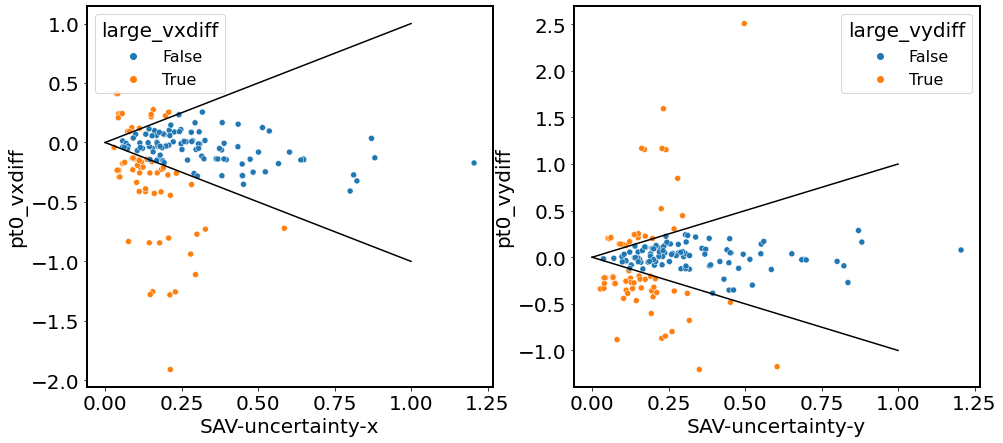

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='pt0_vxdiff', hue='large_vxdiff', ax=axs[0])
axs[0].plot([0, 1], [0, 1], color='black')
axs[0].plot([0, 1], [0, -1], color='black')
sns.scatterplot(data=demo, x='SAV-uncertainty-y', y='pt0_vydiff', hue='large_vydiff', ax=axs[1])
axs[1].plot([0, 1], [0, 1], color='black')
axs[1].plot([0, 1], [0, -1], color='black')

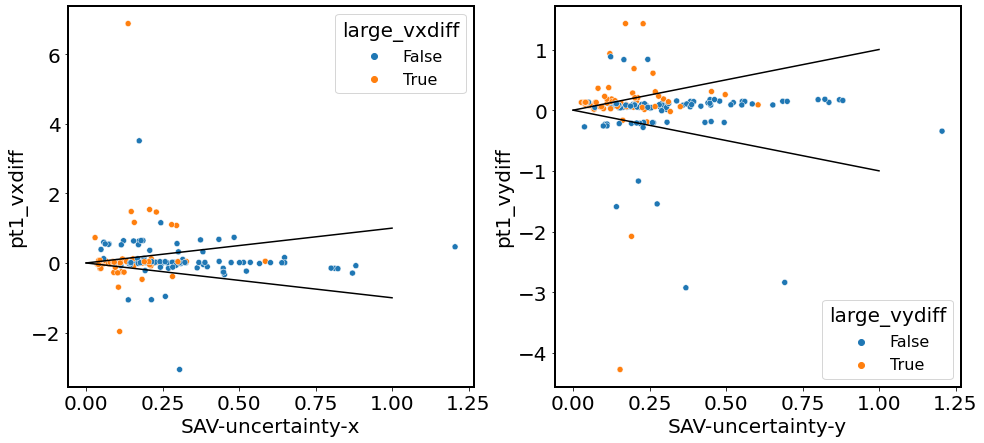

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='pt1_vxdiff', hue='large_vxdiff', ax=axs[0])
axs[0].plot([0, 1], [0, 1], color='black')
axs[0].plot([0, 1], [0, -1], color='black')
sns.scatterplot(data=demo, x='SAV-uncertainty-y', y='pt1_vydiff', hue='large_vydiff', ax=axs[1])
axs[1].plot([0, 1], [0, 1], color='black')
axs[1].plot([0, 1], [0, -1], color='black')

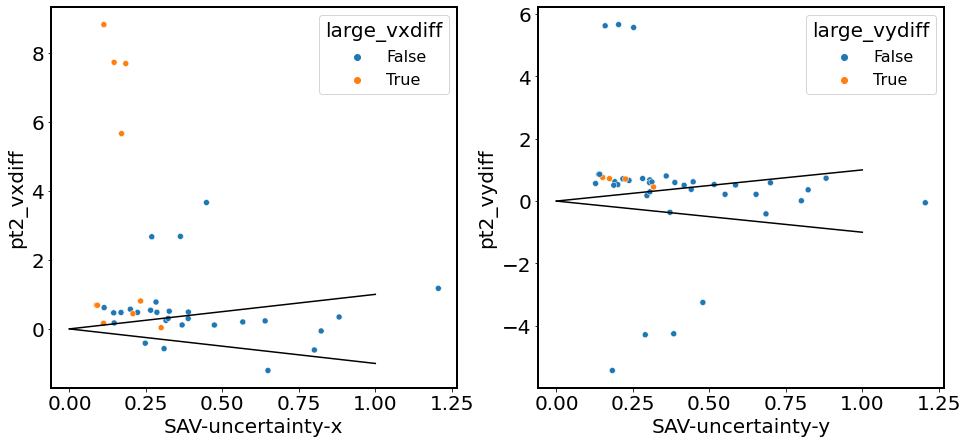

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='pt2_vxdiff', hue='large_vxdiff', ax=axs[0])
axs[0].plot([0, 1], [0, 1], color='black')
axs[0].plot([0, 1], [0, -1], color='black')
sns.scatterplot(data=demo, x='SAV-uncertainty-y', y='pt2_vydiff', hue='large_vydiff', ax=axs[1])
axs[1].plot([0, 1], [0, 1], color='black')
axs[1].plot([0, 1], [0, -1], color='black')

<AxesSubplot:xlabel='SAV-uncertainty-x', ylabel='LSR-uncertainty-nm'>

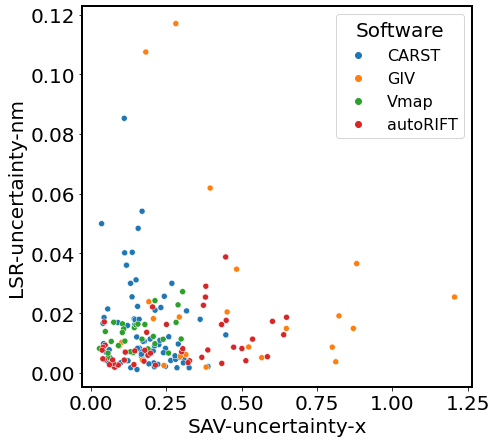

In [8]:
plt.subplots(figsize=(16, 7))
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='LSR-uncertainty-nm', hue='Software', ax)

<AxesSubplot:xlabel='SAV-uncertainty-x', ylabel='SAV-outlier-percent'>

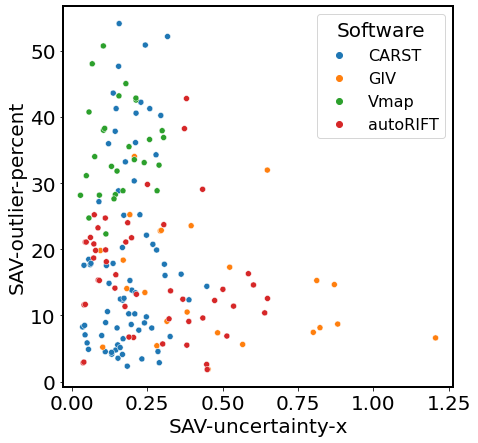

In [15]:
plt.subplots(figsize=(7, 7))
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='SAV-outlier-percent', hue='Software')

<AxesSubplot:xlabel='SAV-uncertainty-x', ylabel='LSR-uncertainty-nm'>

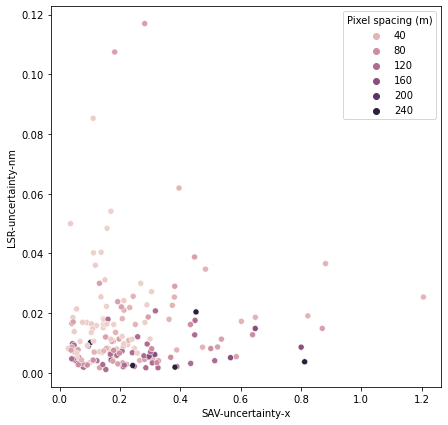

In [6]:
plt.subplots(figsize=(7, 7))
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='LSR-uncertainty-nm', hue='Pixel spacing (m)')

<AxesSubplot:xlabel='SAV-uncertainty-x', ylabel='LSR-uncertainty-nm'>

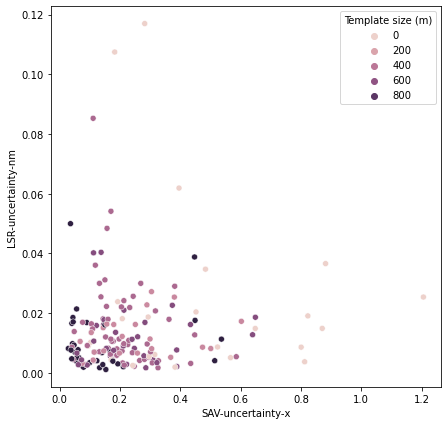

In [7]:
plt.subplots(figsize=(7, 7))
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='LSR-uncertainty-nm', hue='Template size (m)')

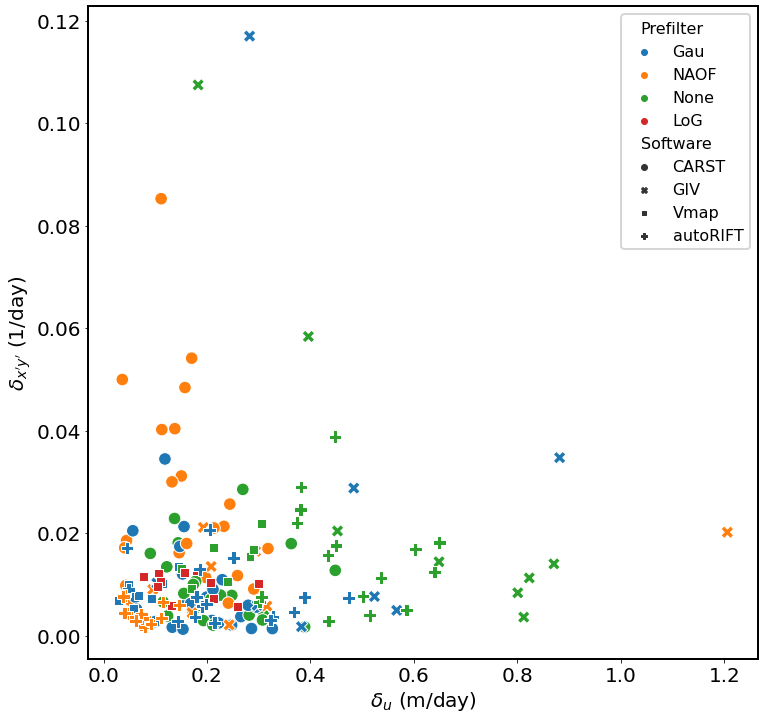

In [11]:
demo = df

fig, ax6 = plt.subplots(1, 1, figsize=(12, 12))
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='LSR-uncertainty-sh', hue='Prefilter', style='Software', s=160, ax=ax6, legend='full')
ax6.set_xlabel('$\delta_u$ (m/day)')
ax6.set_ylabel("$\delta_{x'y'}$ (1/day)")
# ax6.set_xlim(0, 1.2)
legend = ax6.get_legend()
# legend.set_size(10)
legend.get_frame().set_linewidth(2)
fig.patch.set_facecolor('xkcd:white')
# fig.savefig('Fig4.png', dpi=300)

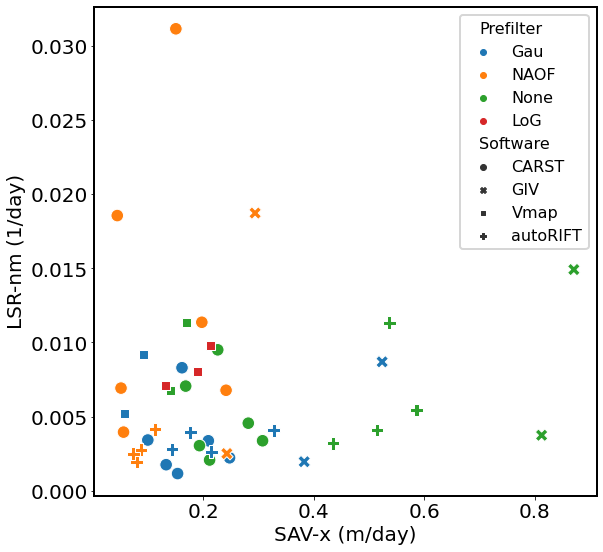

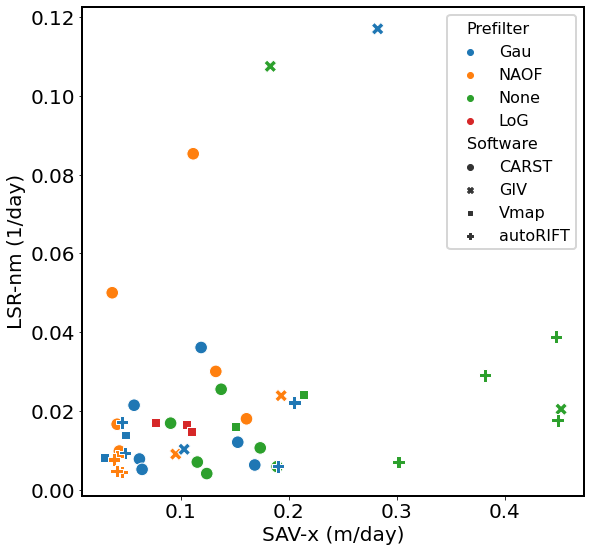

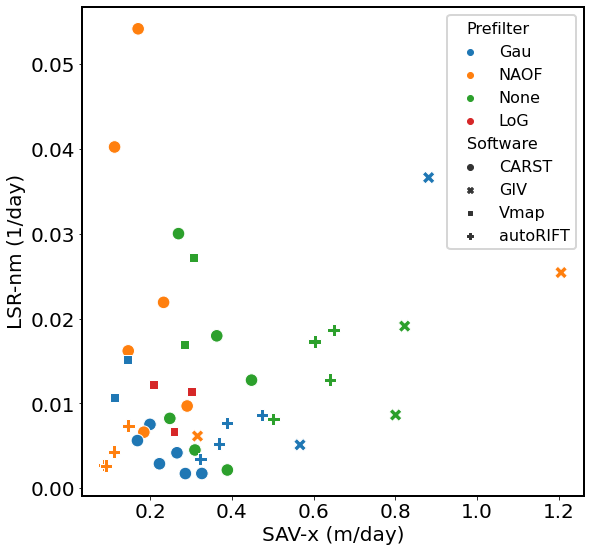

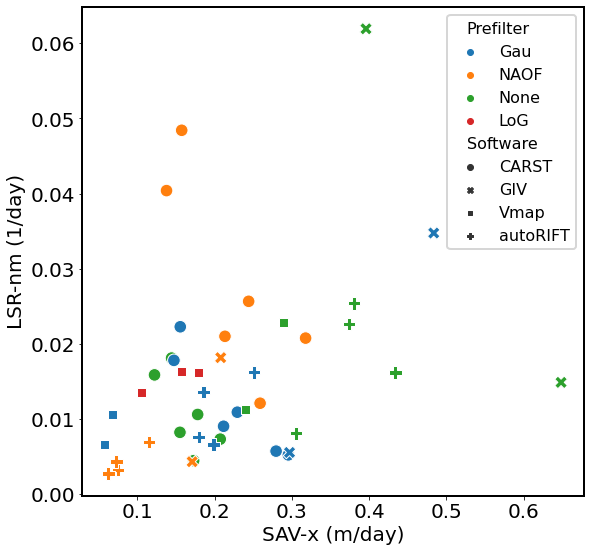

In [9]:
for i in range(4):
    demo = df.loc[df['Date'] == datestrs[i]]
    fig, ax6 = plt.subplots(1, 1, figsize=(9, 9))
    sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='LSR-uncertainty-nm', hue='Prefilter', style='Software', s=160, ax=ax6, legend='full')
    ax6.set_xlabel('SAV-x (m/day)')
    ax6.set_ylabel('LSR-nm (1/day)')
    # ax6.set_xlim(0, 1.2)
    legend = ax6.get_legend()
    # legend.set_size(10)
    legend.get_frame().set_linewidth(2)
    fig.patch.set_facecolor('xkcd:white')
    # fig.savefig('OIE-vs-SS_updated.svg')

<AxesSubplot:xlabel='SAV-uncertainty-x', ylabel='SAV-outlier-percent'>

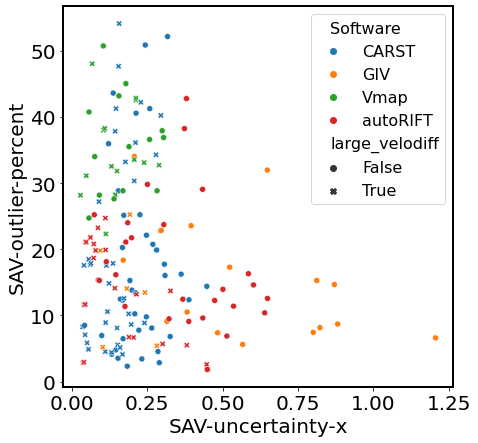

In [18]:
plt.subplots(figsize=(7, 7))
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='SAV-outlier-percent', hue='Software', style='large_velodiff')

<AxesSubplot:xlabel='SAV-uncertainty-x', ylabel='SAV-outlier-percent'>

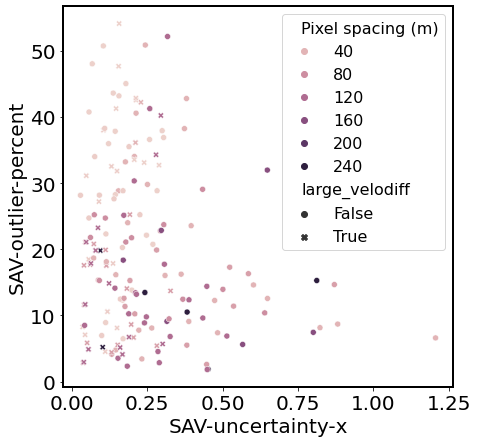

In [61]:
plt.subplots(figsize=(7, 7))
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='SAV-outlier-percent', style='large_velodiff', hue='Pixel spacing (m)')

<AxesSubplot:xlabel='SAV-uncertainty-x', ylabel='LSR-uncertainty-sh'>

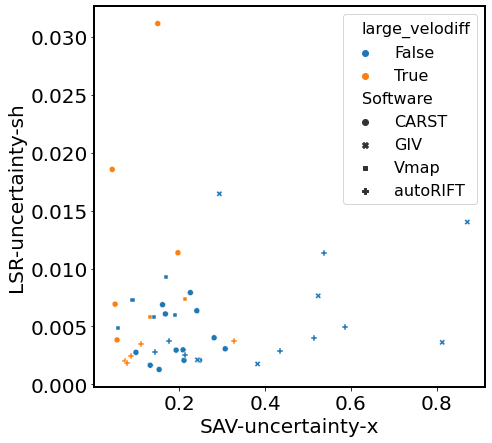

In [43]:
plt.subplots(figsize=(7, 7))
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='LSR-uncertainty-sh', style='Software', hue='large_velodiff')

<AxesSubplot:xlabel='LSR-uncertainty-sh', ylabel='pt0_velodiff'>

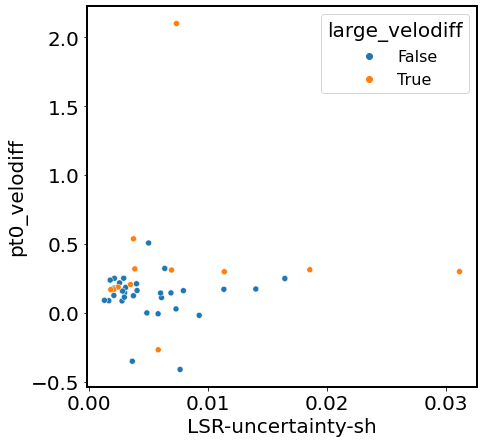

In [42]:
plt.subplots(figsize=(7, 7))
sns.scatterplot(data=demo, x='LSR-uncertainty-sh', y='pt0_velodiff', hue='large_velodiff')

<AxesSubplot:xlabel='SAV-uncertainty-x', ylabel='pt0_velodiff'>

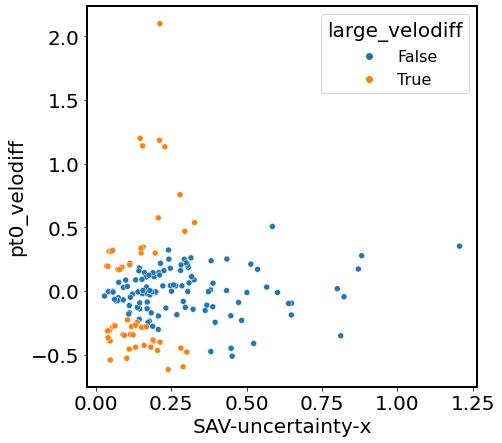

In [60]:
plt.subplots(figsize=(7, 7))
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='pt0_velodiff', hue='large_velodiff')

<AxesSubplot:xlabel='SAV-outlier-percent', ylabel='pt0_velodiff'>

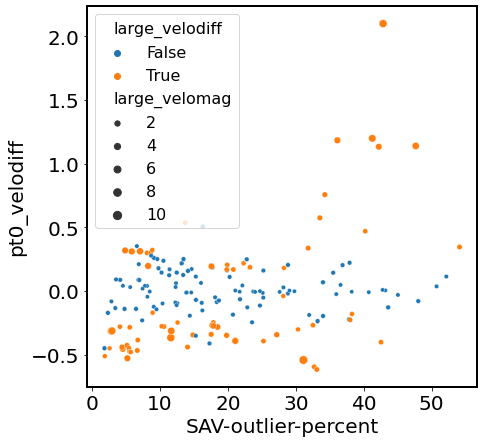

In [72]:
plt.subplots(figsize=(7, 7))
sns.scatterplot(data=demo, x='SAV-outlier-percent', y='pt0_velodiff', hue='large_velodiff', size='large_velomag')

<AxesSubplot:xlabel='LSR-uncertainty-nm', ylabel='pt0_velodiff'>

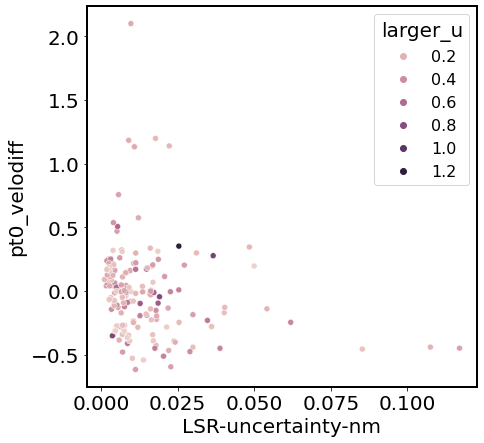

In [74]:
plt.subplots(figsize=(7, 7))
sns.scatterplot(data=demo, x='LSR-uncertainty-nm', y='pt0_velodiff', hue='larger_u')

<AxesSubplot:xlabel='SAV-outlier-percent', ylabel='pt0_velodiff'>

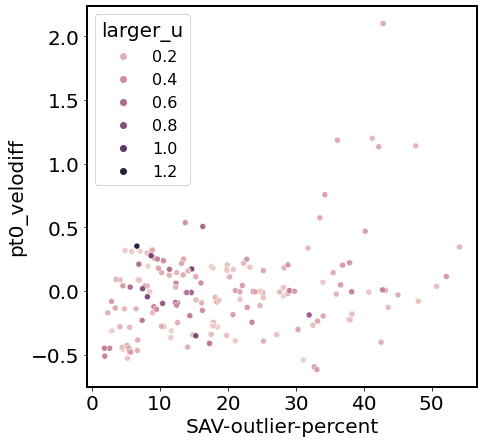

In [75]:
plt.subplots(figsize=(7, 7))
sns.scatterplot(data=demo, x='SAV-outlier-percent', y='pt0_velodiff', hue='larger_u')

<AxesSubplot:xlabel='larger_u', ylabel='LSR-uncertainty-sh'>

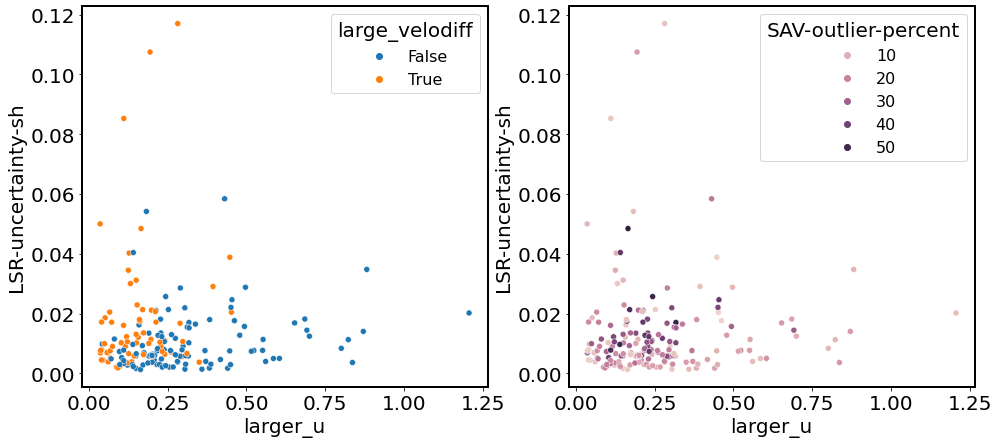

In [122]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
sns.scatterplot(data=demo, x='larger_u', y='LSR-uncertainty-sh', hue='large_velodiff', ax=axs[0])
sns.scatterplot(data=demo, x='larger_u', y='LSR-uncertainty-sh', hue='SAV-outlier-percent', ax=axs[1])

<AxesSubplot:xlabel='larger_u', ylabel='LSR-uncertainty-sh'>

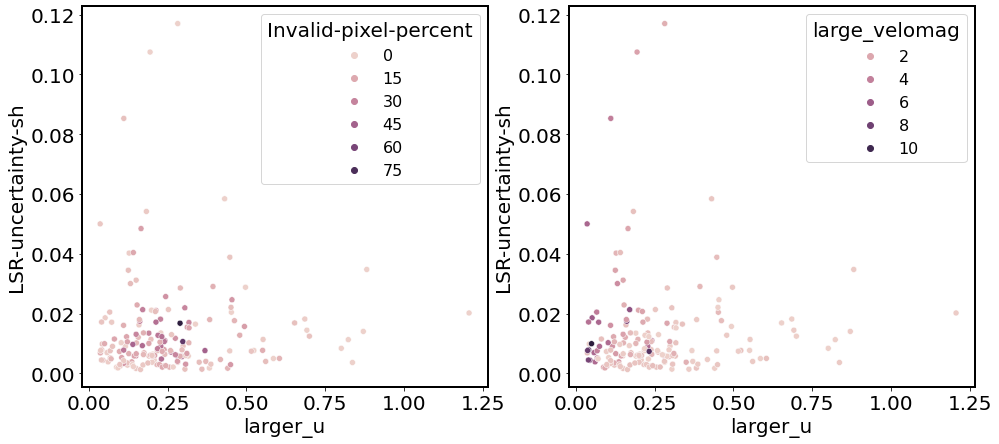

In [123]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
sns.scatterplot(data=demo, x='larger_u', y='LSR-uncertainty-sh', hue='Invalid-pixel-percent', ax=axs[0])
# axs[0].set_ylim(0, 0.02)
sns.scatterplot(data=demo, x='larger_u', y='LSR-uncertainty-sh', hue='large_velomag', ax=axs[1])
# axs[1].set_ylim(0, 0.02)

(0.0, 0.02)

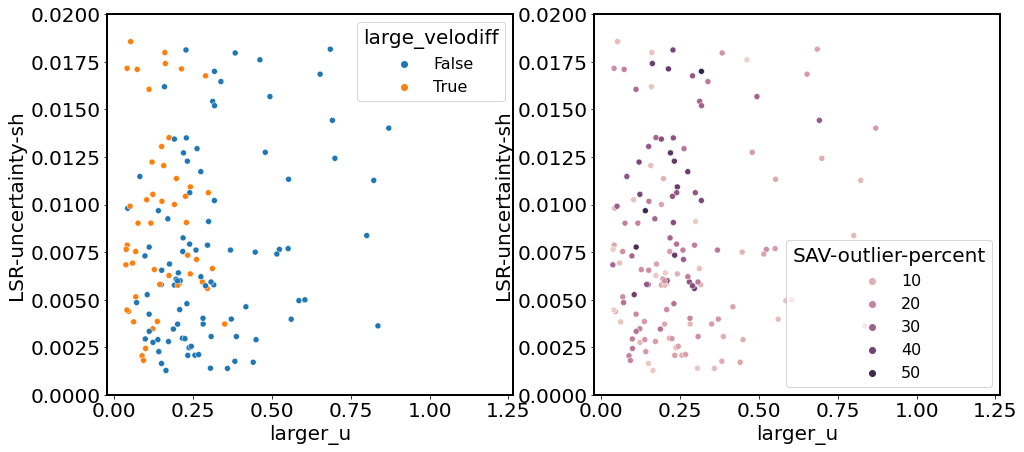

In [124]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
sns.scatterplot(data=demo, x='larger_u', y='LSR-uncertainty-sh', hue='large_velodiff', ax=axs[0])
axs[0].set_ylim(0, 0.02)
sns.scatterplot(data=demo, x='larger_u', y='LSR-uncertainty-sh', hue='SAV-outlier-percent', ax=axs[1])
axs[1].set_ylim(0, 0.02)

(0.0, 0.02)

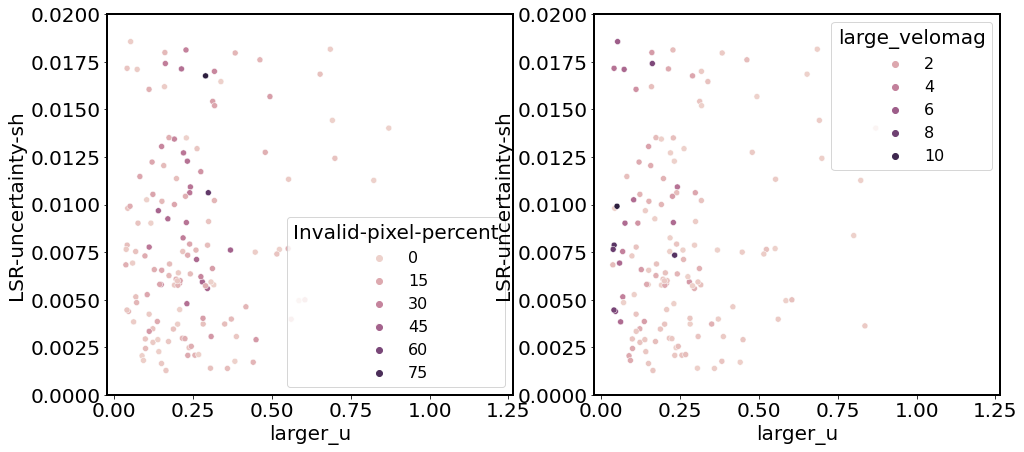

In [125]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7))
sns.scatterplot(data=demo, x='larger_u', y='LSR-uncertainty-sh', hue='Invalid-pixel-percent', ax=axs[0])
axs[0].set_ylim(0, 0.02)
sns.scatterplot(data=demo, x='larger_u', y='LSR-uncertainty-sh', hue='large_velomag', ax=axs[1])
axs[1].set_ylim(0, 0.02)

<AxesSubplot:xlabel='SAV-outlier-percent', ylabel='LSR-uncertainty-sh'>

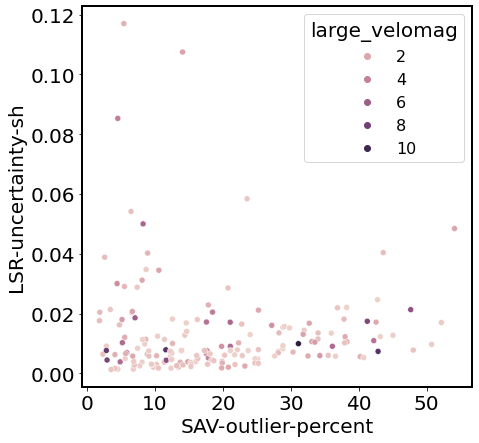

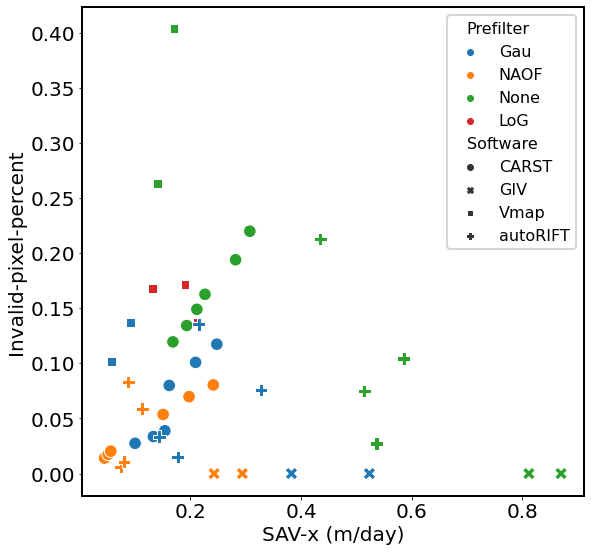

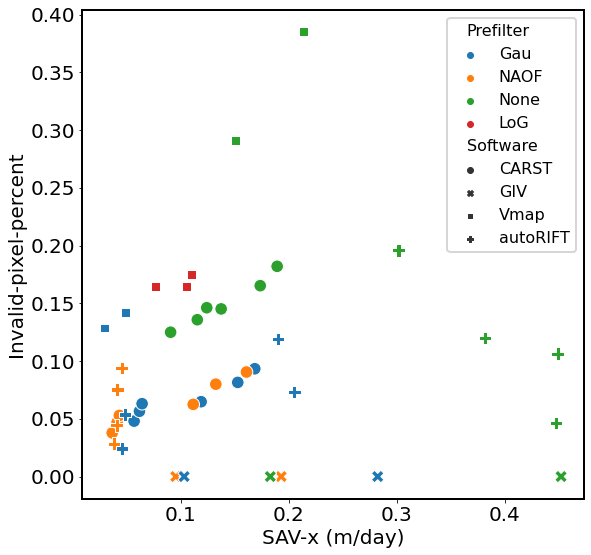

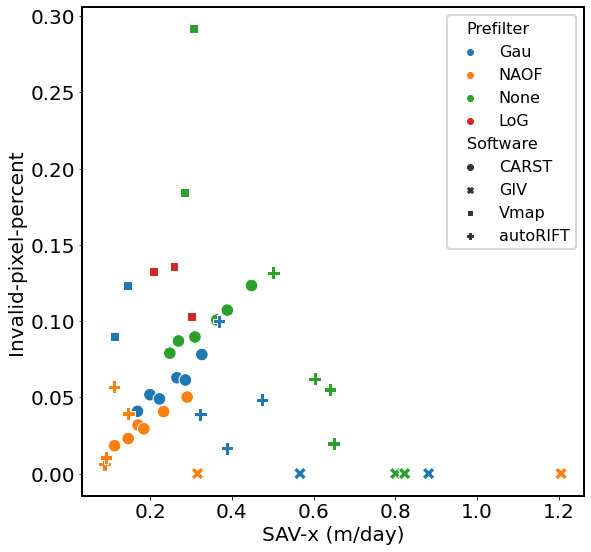

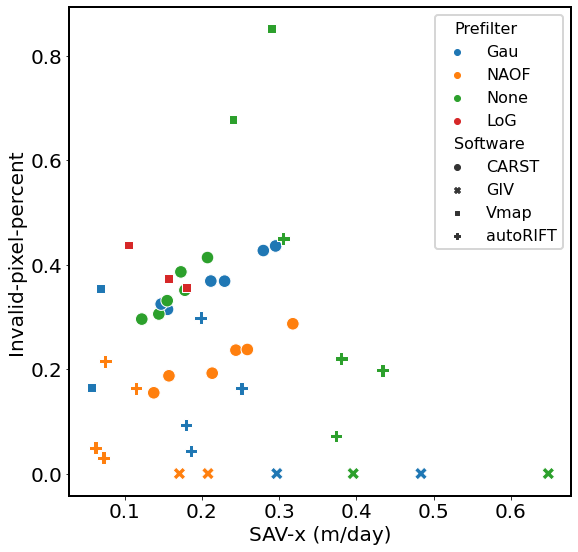

In [100]:
for i in range(4):
    demo = df.loc[df['Date'] == datestrs[i]]
    fig, ax6 = plt.subplots(1, 1, figsize=(9, 9))
    sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='Invalid-pixel-percent', hue='Prefilter', style='Software', s=160, ax=ax6, legend='full')
    ax6.set_xlabel('SAV-x (m/day)')
    ax6.set_ylabel('Invalid-pixel-percent')
    # ax6.set_xlim(0, 1.2)
    legend = ax6.get_legend()
    # legend.set_size(10)
    legend.get_frame().set_linewidth(2)
    fig.patch.set_facecolor('xkcd:white')
    # fig.savefig('OIE-vs-SS_updated.svg')

In [129]:
tmp = df.sort_values(by='larger_u')
tmp.iloc[:10]

,Date,Duration (days),Template size (px),Template size (m),Pixel spacing (px),Pixel spacing (m),Prefilter,Subpixel,Software,Vx,...,LSR-uncertainty-nm,LSR-uncertainty-sh,pt0_velodiff,pt1_velodiff,pt2_velodiff,SAV-outlier-percent,Invalid-pixel-percent,larger_u,large_velodiff,large_velomag
64,LS8-20180802-20180818,16,64,960.0,1,15.0,NAOF,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,...,0.049987,0.049987,0.196769,-0.098366,NaN,8.257912,3.782803,0.036309,True,5.419256
99,LS8-20180802-20180818,16,65,975.0,1,15.0,Gau,parabolic,Vmap,/home/jovyan/Projects/PX_comparison/PX/Vmap/pa...,...,0.008197,0.006831,-0.038561,0.770025,NaN,28.167143,12.864866,0.037044,True,1.040953
146,LS8-20180802-20180818,16,64,960.0,4,60.0,NAOF,pyrUP,autoRIFT,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,...,0.007645,0.007645,-0.314717,-0.099321,NaN,2.843582,2.845308,0.037996,True,8.282856
147,LS8-20180802-20180818,16,64,960.0,8,120.0,NAOF,pyrUP,autoRIFT,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,...,0.004744,0.004456,-0.311703,-0.098966,NaN,2.948707,4.432740,0.040478,True,7.700483
67,LS8-20180802-20180818,16,64,960.0,4,60.0,NAOF,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,...,0.016606,0.017160,0.194248,-0.099527,NaN,17.585616,4.697983,0.040864,True,4.753569
144,LS8-20180802-20180818,16,32,480.0,4,60.0,NAOF,pyrUP,autoRIFT,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,...,0.008582,0.007867,-0.365640,0.010075,NaN,11.603750,7.536194,0.041101,True,8.896059
70,LS8-20180802-20180818,16,64,960.0,8,120.0,NAOF,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,...,0.009804,0.009804,-0.003792,-0.058469,NaN,8.503429,5.292653,0.042922,False,0.088337
145,LS8-20180802-20180818,16,32,480.0,8,120.0,NAOF,pyrUP,autoRIFT,/home/jovyan/Projects/PX_comparison/PX/autoRIF...,...,0.004525,0.004384,-0.312391,0.009076,NaN,11.670934,9.394275,0.045204,True,6.910618
98,LS8-20180802-20180818,16,31,465.0,1,15.0,Gau,parabolic,Vmap,/home/jovyan/Projects/PX_comparison/PX/Vmap/pa...,...,0.013875,0.009910,-0.540826,0.312534,NaN,31.126721,14.199565,0.050199,True,10.773559
28,LS8-20180304-20180405,32,64,960.0,1,15.0,NAOF,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,...,0.018563,0.018563,0.312732,-0.056477,NaN,7.070873,1.400978,0.052115,True,6.000780


<AxesSubplot:xlabel='SAV-uncertainty-x', ylabel='Invalid-pixel-percent'>

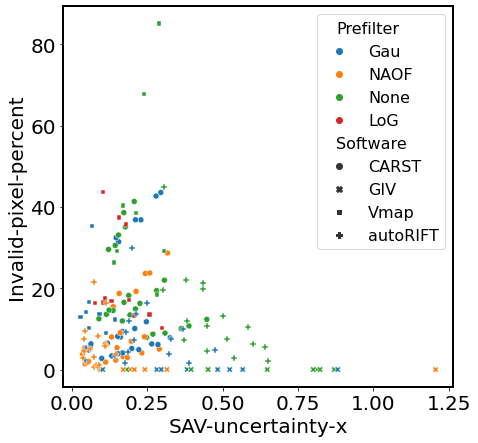

In [128]:
plt.subplots(figsize=(7, 7))
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='Invalid-pixel-percent', hue='Prefilter', style='Software')

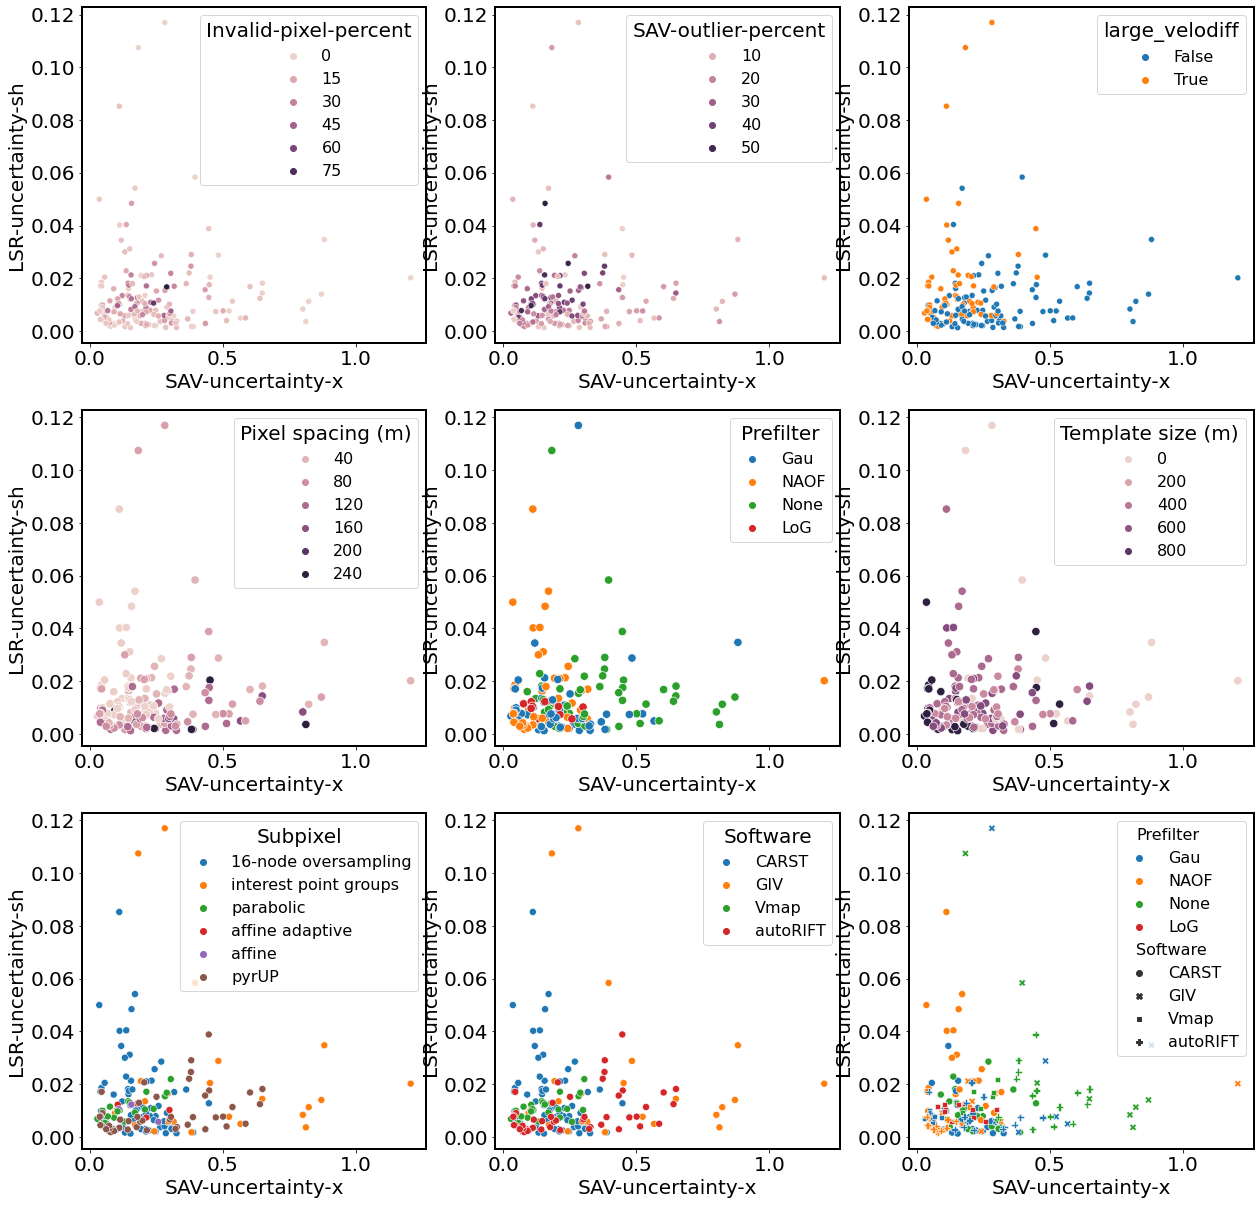

In [149]:
fig, axs = plt.subplots(3, 3, figsize=(21, 21))
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='LSR-uncertainty-sh', hue='Invalid-pixel-percent', ax=axs[0, 0])
# axs[0].set_ylim(0, 0.02)
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='LSR-uncertainty-sh', hue='SAV-outlier-percent', ax=axs[0, 1])
# axs[1].set_ylim(0, 0.02)
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='LSR-uncertainty-sh', hue='large_velodiff', ax=axs[0, 2])
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='LSR-uncertainty-sh', hue='Pixel spacing (m)', s=70, ax=axs[1, 0])
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='LSR-uncertainty-sh', hue='Prefilter', s=70, ax=axs[1, 1])
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='LSR-uncertainty-sh', hue='Template size (m)', s=70, ax=axs[1, 2])
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='LSR-uncertainty-sh', hue='Subpixel', s=50, ax=axs[2, 0])
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='LSR-uncertainty-sh', hue='Software', s=50, ax=axs[2, 1])
sns.scatterplot(data=demo, x='SAV-uncertainty-x', y='LSR-uncertainty-sh', hue='Prefilter', style='Software', s=50, ax=axs[2, 2])
fig.patch.set_facecolor('xkcd:white')
fig.savefig('Fig4-tmp.png', dpi=300)